## Phase 2

### Header
#### Course Name: 
#### phase #: 2
#### term project name:

### Q Write down the following information: 
#### 1. Problem Statement: 



#### 2. Hypothesis:
   + hypothesis 1:  
   + hypothesis 2:
   + ...

#### 3 Cleaned Datasets
Display the cleaned dataset after phase 1


In [31]:
# import your cleaned dataset
import pandas as pd 
df= pd.read_csv('data_imputated.csv')
df.head()
# display the first five rows data.head(5)

,puma,year,mergeid,estimate_black_females,estimate_total_pop,percent_black_only,percent_black_women,quantile_black_women,gini_index,percent_second_mortgage,...,disability_status,total_housing_units,num_renter_occupied,num_owner_occupied,num_total_occupied,percent_born_us,english_prof,percent_college,percent_uninsured,percent_unemployed
0,3603701,2011,3603701 _ 2011,8349,106558,14.3,7.835170,3,0.4852,14.0,...,14.349000,45433,28757,12714,41471,62.3,20.3,38.7,11.983000,6.3
1,3603702,2011,3603702 _ 2011,56929,144403,70.4,39.423696,5,0.4291,14.9,...,11.125000,51321,29678,17780,47458,56.1,7.7,22.1,14.353333,8.5
2,3603703,2011,3603703 _ 2011,17630,115784,27.2,15.226629,4,0.4293,13.6,...,13.975333,48946,23433,22537,45970,76.3,10.2,24.2,9.534667,5.5
3,3603704,2011,3603704 _ 2011,15386,125976,23.0,12.213437,3,0.4500,19.0,...,13.169000,47577,31071,13398,44469,58.9,21.2,23.2,13.788667,6.4
4,3603705,2011,3603705 _ 2011,30973,154386,36.4,20.062052,4,0.4847,12.1,...,14.863333,55842,47237,3850,51087,60.8,28.5,9.7,15.490667,8.4


In [33]:
import geopandas as gpd
import zipfile 
from io import BytesIO
import geopandas as gpd
from urllib.request import urlopen
import json
#Please repeat if it does not work
with urlopen('https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycd_21a.zip') as response:
    file = zipfile.ZipFile(BytesIO(response.read()))
    file.extractall('community_districts_shapefiles/')
gdf = gpd.read_file('community_districts_shapefiles/nycd_21a/nycd.shp')
borough = {'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'}

In [38]:
cds_dict = {
'Bronx' :  {1:3710,
            2:3710,
            3:3705, 
            6:3705, 
            4:3708, 
            5:3707, 
            7:3706, 
            8:3701, 
            9:3709, 
            10:3703, 
            11:3704, 
            12:3702}, 
'Manhattan': {
            1:3810,  
            2:3810, 
            3:3809, 
            4:3807,
            5:3807, 
            6:3808, 
            7:3806, 
            8:3805, 
            9:3802, 
            10:3803, 
            11:3804,
            12:3801},
'Staten Island': {
            1:3903, 
            2:3902, 
            3:3901},
'Brooklyn': {
            1:4001, 
            2:4004, 
            3:4003, 
            4:4002, 
            5:4008, 
            6:4005, 
            7:4012, 
            8:4006, 
            9:4011, 
            10:4013,
            11:4017, 
            12:4014, 
            13:4018, 
            14:4015, 
            15:4016, 
            16:4007,
            17:4010, 
            18:4009},
'Queens':  {  
            1:4101, 
            2:4109, 
            3:4102,
            4:4107, 
            5:4110,
            6:4108,
            7:4103, 
            8:4106, 
            9:4111, 
            10:4113, 
            11:4104,
            12:4112,
            13:4105,
            14:4114}}
borough = {'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'}
gdf['Borough'] = gdf['BoroCD'].astype(str).str[0].map(borough)
gdf['CD'] = gdf['BoroCD'].astype(str).str[1:].astype(int)
import numpy as np 
def apply_cd(x):
    try:
        return cds_dict[x['Borough']][x['CD']]
    except:
        return np.nan
gdf['PUMA'] = gdf.apply(lambda x: apply_cd(x), axis = 1)

#### 4 EDA  
Read the piazza post for reference https://piazza.com/class/kk6xmjqekrl1e9?cid=154

**4.1 Method 1**

#### operation name: geostpatial analyzation of variables
#### Reason for doing this: the reason for doing this is so that we are able to find locations where the values of a specific variable are. Once found, we hope to see clustering that may help us pic spatial lag features
#### Outcome: We see that clustering does exist 

In [110]:
# code for operation
import geopandas as gpd

import matplotlib.pyplot as plt 
import contextily as ctx
imputated_df = df.copy()
dict_geoms = gdf.set_index('PUMA')['geometry'].to_dict()
imputated_df['puma_id'] = imputated_df['puma'].astype(str).str[3:]

imputated_df['geometry'] = imputated_df['puma_id'].astype(float).apply(lambda x :dict_geoms[x])

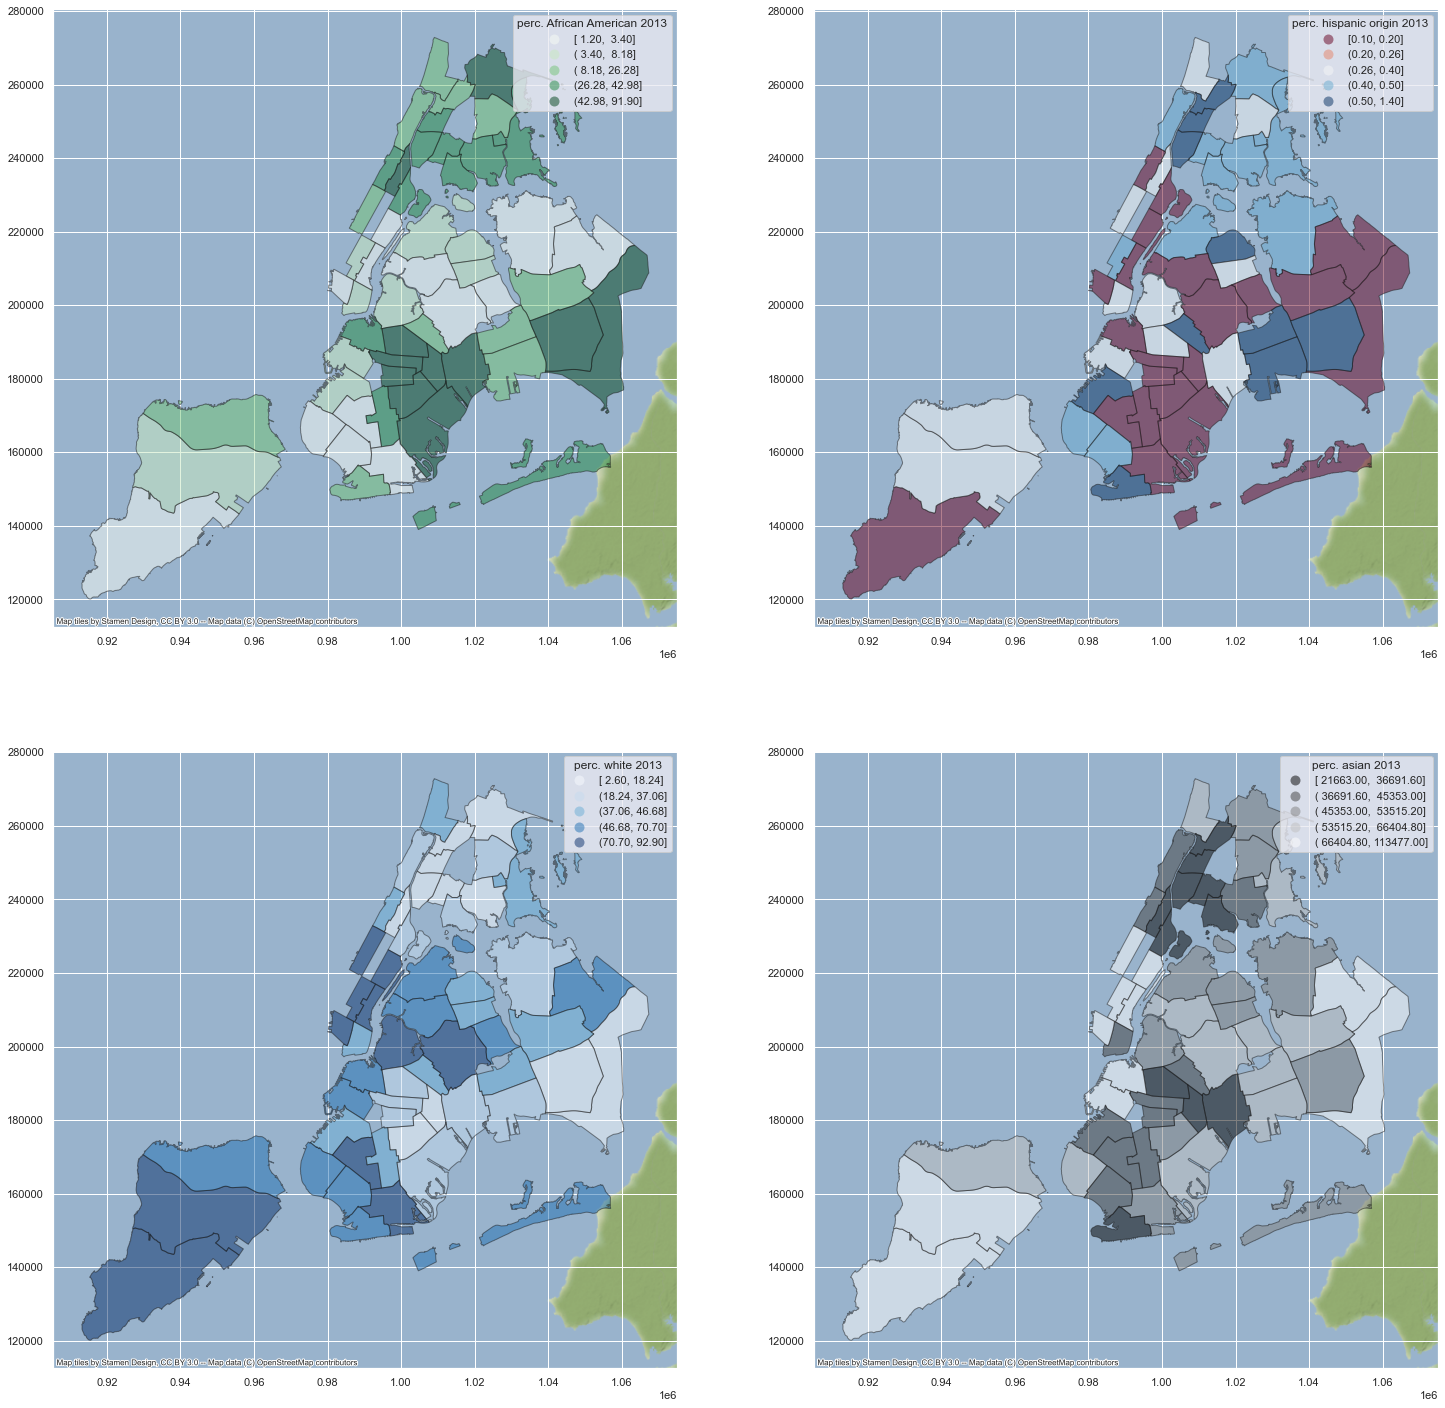

In [111]:
# code for display
import matplotlib.pyplot as plt
gdf_DI = gpd.GeoDataFrame(imputated_df, geometry = 'geometry')
yr_gdf = gdf_DI[gdf_DI['year'] == 2013].copy()


fig, axs = plt.subplots(2, 2,figsize=(25,25))
yr_gdf.plot(column = 'percent_black_only',ax = axs[0,0] ,alpha=0.5, edgecolor='k',cmap='Greens', scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. African American 2013'}) # red is increase tax
yr_gdf.plot(column = 'percent_american_indian',ax = axs[0,1] , alpha=0.5, edgecolor='k',cmap= 'RdBu',scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. hispanic origin 2013'}) # 10 decrease in african american  
yr_gdf.plot(column = 'percent_white_only',ax = axs[1,0] ,alpha=0.5, edgecolor='k',cmap='Blues', scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. white 2013'}) # red is increase tax
yr_gdf.plot(column = 'median_income',ax = axs[1,1] , alpha=0.5, edgecolor='k',cmap= 'gray',scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. asian 2013'}) # 10 decrease in african american 
ctx.add_basemap(axs[0,0])
ctx.add_basemap(axs[0,1])
ctx.add_basemap(axs[1,0])
ctx.add_basemap(axs[1,1])

**4.2 Method 2**

#### operation name: Moran Statistic to find spatial dependency 
#### Reason for doing this:
#### Outcome: that means we can use spatial lag as a new feature from which we can train the data on!  

In [122]:
# code for operation
# MORAN STATISTIC 
from esda.moran import Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
import pysal as ps 

dropping_duplicates = imputated_df.drop_duplicates('puma_id')
w = ps.lib.weights.Queen.from_dataframe(dropping_duplicates, idVariable='puma_id')
w.transform = 'r'

('WARNING: ', '4114', ' is an island (no neighbors)')


In [123]:
imputated_df

,puma,year,mergeid,estimate_black_females,estimate_total_pop,percent_black_only,percent_black_women,quantile_black_women,gini_index,percent_second_mortgage,...,num_renter_occupied,num_owner_occupied,num_total_occupied,percent_born_us,english_prof,percent_college,percent_uninsured,percent_unemployed,puma_id,geometry
0,3603701,2011,3603701 _ 2011,8349,106558,14.3,7.835170,3,0.4852,14.000000,...,28757,12714,41471,62.3,20.3,38.7,11.983000,6.3,3701,"POLYGON ((1012820.693 271349.052, 1012821.477 ..."
1,3603702,2011,3603702 _ 2011,56929,144403,70.4,39.423696,5,0.4291,14.900000,...,29678,17780,47458,56.1,7.7,22.1,14.353333,8.5,3702,"POLYGON ((1041252.473 261280.034, 1041167.230 ..."
2,3603703,2011,3603703 _ 2011,17630,115784,27.2,15.226629,4,0.4293,13.600000,...,23433,22537,45970,76.3,10.2,24.2,9.534667,5.5,3703,"MULTIPOLYGON (((1042822.450 243439.814, 104255..."
3,3603704,2011,3603704 _ 2011,15386,125976,23.0,12.213437,3,0.4500,19.000000,...,31071,13398,44469,58.9,21.2,23.2,13.788667,6.4,3704,"POLYGON ((1031732.164 252970.294, 1031709.189 ..."
4,3603705,2011,3603705 _ 2011,30973,154386,36.4,20.062052,4,0.4847,12.100000,...,47237,3850,51087,60.8,28.5,9.7,15.490667,8.4,3705,"POLYGON ((1017255.596 244431.387, 1017249.730 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,3604110,2017,3604110 _ 2017,1531,181598,1.8,0.843071,1,0.4319,9.787541,...,35426,26353,61779,57.4,23.4,27.5,12.000000,3.8,4110,"POLYGON ((1015372.060 206818.665, 1015537.002 ..."
381,3604111,2017,3604111 _ 2017,5266,155032,6.3,3.396718,2,0.4262,8.285055,...,23994,20760,44754,45.7,26.6,26.2,12.600000,4.7,4111,"POLYGON ((1034962.285 195826.459, 1034998.739 ..."
382,3604112,2017,3604112 _ 2017,84438,244302,63.2,34.562959,5,0.4276,9.560914,...,36407,34880,71287,55.4,14.3,21.0,10.800000,7.1,4112,"POLYGON ((1039267.326 182097.875, 1039271.417 ..."
383,3604113,2017,3604113 _ 2017,11475,138868,15.8,8.263243,3,0.4412,7.386304,...,13367,25992,39359,51.5,13.3,21.3,10.000000,5.7,4113,"MULTIPOLYGON (((1023868.747 176222.723, 102336..."


In [124]:

y = df_2015 = imputated_df[imputated_df['year'] == 2015][['puma_id','percent_black_only','geometry']]
x = df_2014 = imputated_df[imputated_df['year'] == 2014][['puma_id','percent_black_only','geometry']]
merged = x.merge(y, on = ['puma_id','geometry'],how = 'inner')
w = ps.lib.weights.Queen.from_dataframe(merged, idVariable='puma_id')
y_val = merged['percent_black_only_y']
x_val = merged['percent_black_only_x']

C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\pysal\lib\weights\contiguity.py:185: UserWarning: There is one disconnected observation (no neighbors).
Island id: 4114
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', '4114', ' is an island (no neighbors)')


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Bivariate Moran Scatterplot (0.48)'}, xlabel='Attribute X', ylabel='Spatial Lag of Y'>)

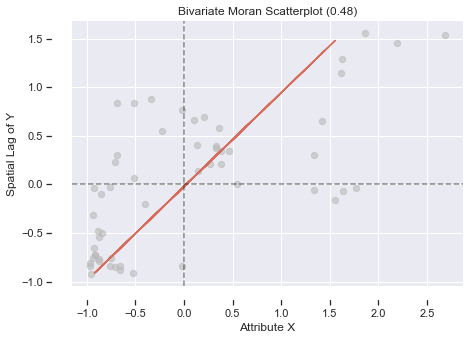

In [125]:
# code for display
moran_bv = Moran_BV(y_val, x_val, w)
moran_scatterplot(moran_bv)

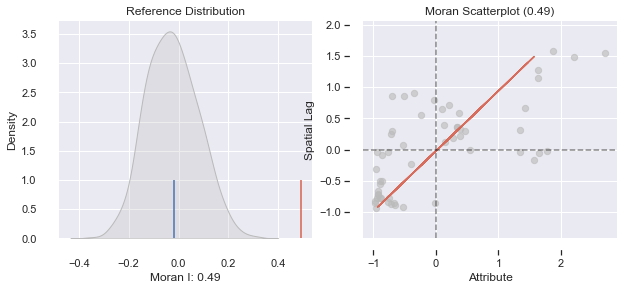

In [126]:
from splot.esda import moran_scatterplot
from splot.esda import plot_moran
from esda.moran import Moran
moran = Moran(y_val,w)
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [129]:
# huge spatial dependency we reject the null hypothesis 
print( "P-value of moran Bi-variate on a yearly basis: " + str(moran_bv.p_sim))
print( "P-value of Moran statistics of a single variable: "+ str(moran.p_z_sim))

P-value of moran Bi-variate on a yearly basis: 0.001
P-value of Moran statistics of a single variable: 3.535493313666649e-07


**4.3 Method 3**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [132]:
# code for operation
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr_df = imputated_df.drop(['puma_id','puma','mergeid', 'year'], axis = 1)
corr = corr_df.corr()

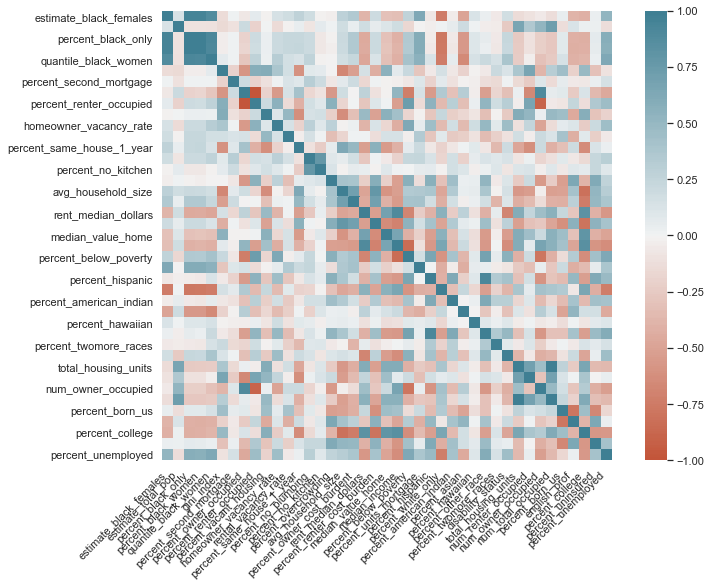

In [133]:
# code for display
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**4.4 Method 4**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# please run this 
# !pip install pca 

In [136]:
# code for operation
from pca import pca
from sklearn import preprocessing
df2 = imputated_df.drop(['puma_id','puma','mergeid', 'year','geometry'], axis = 1).copy()

model = pca()
# Fit transform

out = model.fit_transform(preprocessing.StandardScaler().fit_transform(df2))

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [41] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [16] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


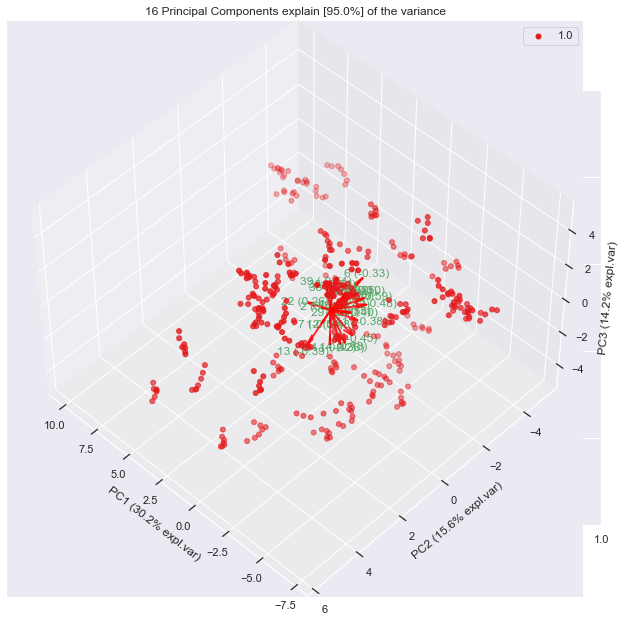

(<Figure size 720x576 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x237e8509188>)

In [138]:
model.biplot3d()

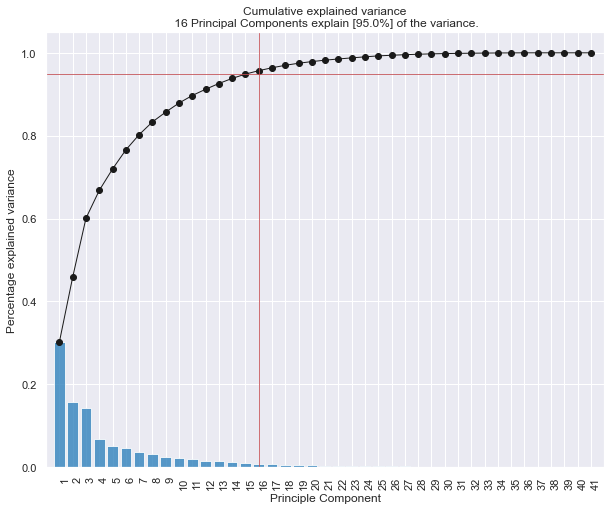

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 16 Principal Components explain [95.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 842.4x595.44 with 0 Axes>

In [141]:
model.plot()


**4.5 Method 5**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

**4.6 Method 6**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

**4.7 Method 7**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

**4.8 Method 8**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

**4.9 Method 9**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

**4.10 Method 10**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

### Submission guideline:
1. write your code and report in this notebook. 
2. save this notebook as <person1ubname_person2ubname.ipynb>.
3. save your raw data in data folder.
4. save the notebook file with data folder in a folder named <person1ubname_person2ubname.zip>. 
5. upload your zip file to the ub learns.

**Each person from a team needs to make submissions.**

### Grading:
    0 – no submission by deadline
    5 – with 0-3 valid and non-repeating EDA operations;
    10 – with 4-8 valid and non-repeating EDA operations;
    15 – with 9 valid and non-repeating EDA operations;
    20 - with 10 valid and non-repeating EDA operations;
    25 - Completely master EDA and every step is perfect;
    
Once the deadline is past, you get a zero for the phase if you did not submit anything, even though you need to complete the phase to work on the next phase.
